In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

tf.__version__

'2.0.0'

In [2]:
# Downloading the data, if it does not exist, this will take some time... (>120MB)
import urllib
import os
if not os.path.isfile('8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","8_faces_train_and_valid.hdf5")

In [3]:
import h5py
h5f_X = h5py.File('8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'].value
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'].value
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'].value
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'].value
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']


D:\Programme\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


250


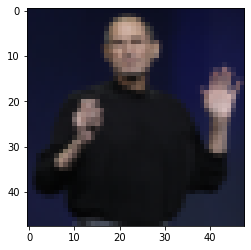

In [4]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
n = 4 
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n),(250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0],dtype="uint8"))

In [5]:
#Downloading the data, if it does not exist
if not os.path.isfile('8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","8_faces_test.hdf5")
h5f_X = h5py.File('8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'].value
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'].value
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


In [6]:
np.min(X_train),np.max(X_train),np.min(X_test),np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

<h3>a) Training an CNN from scratch</h3>

Train a model (as shown below) from scratch, using the training data for training and the validation data for validation. For all activations in the hidden layer use the 'ReLU', for the last layer use softmax. Use 3x3 convolutions and use padding = same.

- Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.
- Calculate the accuracy on the test set (you should reach an accuracy of about 0.54)
- Calculate the confusion matrix
- Have a look at missclassified examples

Image of the network: https://github.com/ioskn/mldl_htwg/blob/master/uebungen/dl_cnn_faces_net.png

In [7]:
model = Sequential()
model.add(Conv2D(15, kernel_size=(3, 3),activation='relu',padding='SAME',input_shape=(48, 48, 3)))
model.add(Conv2D(15, kernel_size=(3, 3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(30, kernel_size=(3, 3),activation='relu',padding='SAME'))
model.add(Conv2D(30, kernel_size=(3, 3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 15)        420       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 15)        2040      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 30)        4080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1080)              0

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train,
          epochs=10, 
          batch_size=16,
          validation_data=(X_valid, Y_valid))

Train on 2000 samples, validate on 400 samples
Epoch 1/10
2000/2000 [==============================] - 26s 13ms/sample - loss: 1.9186 - accuracy: 0.2495 - val_loss: 1.7283 - val_accuracy: 0.3600
Epoch 2/10
2000/2000 [==============================] - 25s 13ms/sample - loss: 1.6384 - accuracy: 0.3965 - val_loss: 1.5473 - val_accuracy: 0.4400
Epoch 3/10
2000/2000 [==============================] - 25s 13ms/sample - loss: 1.4361 - accuracy: 0.4720 - val_loss: 1.4350 - val_accuracy: 0.5025
Epoch 4/10
2000/2000 [==============================] - 25s 13ms/sample - loss: 1.2246 - accuracy: 0.5530 - val_loss: 1.3113 - val_accuracy: 0.4950
Epoch 5/10
2000/2000 [==============================] - 26s 13ms/sample - loss: 1.1030 - accuracy: 0.6105 - val_loss: 1.2970 - val_accuracy: 0.5125
Epoch 6/10
2000/2000 [==============================] - 25s 13ms/sample - loss: 0.9640 - accuracy: 0.6700 - val_loss: 1.2922 - val_accuracy: 0.5400
Epoch 7/10
2000/2000 [==============================] - 25s 13ms/

- Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.

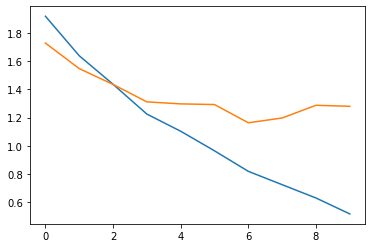

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

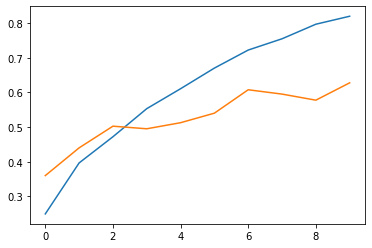

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

- Calculate the accuracy on the test set (you should reach an accuracy of about 0.54)

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0327975964546203
Test accuracy: 0.65


- Calculate the confusion matrix

In [14]:
Y_pred = model.predict(X_test)
#Y_pred.shape, Y_test.shape

In [35]:
class_count = len(set(Y_test))
missclassified = []
confusion = np.zeros((class_count, class_count))
for cl in range(Y_test.shape[0]):
    label = Y_test[cl]
    pred = np.argmax(Y_pred[cl])
    confusion[pred,label] += 1
    if pred != label:
        missclassified.append(cl)
print(confusion)

[[40.  0.  1.  3.  0.  0.  4.  2.]
 [ 2. 31.  3.  8.  8. 11.  3. 11.]
 [ 3.  4. 38.  3.  0.  4.  6.  6.]
 [ 0.  3.  1. 26.  1.  3.  1.  1.]
 [ 0.  7.  0.  0. 39.  1.  1.  3.]
 [ 0.  2.  4.  7.  0. 28.  1.  1.]
 [ 3.  1.  0.  1.  1.  2. 32.  0.]
 [ 2.  2.  3.  2.  1.  1.  2. 26.]]


- Have a look at missclassified examples

Truth: Jamie Foxx (actor) Prediction: Chris Martin (singer)


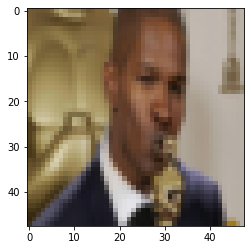

In [58]:
classes = ['Miranda Cosgrove', 
           'Chris Martin (singer)', 
           'Emma Stone (actress)', 
           'Jamie Foxx (actor)', 
           'Steve Jobs (entrepreneur)', 
           'Zac Efron (actor)', 
           'Sandra Oh (actress)', 
           'Taryn Manning (actress)']
mcl = missclassified[0]
print('Truth:',classes[Y_test[mcl]], 'Prediction:', classes[np.argmax(Y_pred[mcl])])
plt.imshow(X_test[mcl]);

Truth: Chris Martin (singer) Prediction: Steve Jobs (entrepreneur)


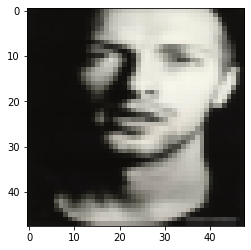

In [59]:
mcl = missclassified[1]
print('Truth:',classes[Y_test[mcl]], 'Prediction:', classes[np.argmax(Y_pred[mcl])])
plt.imshow(X_test[mcl]);

Truth: Jamie Foxx (actor) Prediction: Chris Martin (singer)


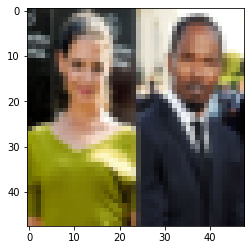

In [60]:
mcl = missclassified[2]
print('Truth:',classes[Y_test[mcl]], 'Prediction:', classes[np.argmax(Y_pred[mcl])])
plt.imshow(X_test[mcl]);

Truth: Miranda Cosgrove Prediction: Taryn Manning (actress)


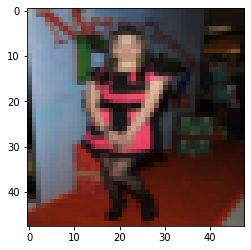

In [61]:
mcl = missclassified[3]
print('Truth:',classes[Y_test[mcl]], 'Prediction:', classes[np.argmax(Y_pred[mcl])])
plt.imshow(X_test[mcl]);

<h3>b) Training using transfer learning</h3>

In transfer learning you use an existing trained model with given weights trained on a different task. You then add a few layers yourself and only train them.

In [57]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (img_width, img_height, 3))

58892288/58889256 [==============================] - 29s 0us/step


In [66]:
fc1 = base_model.output
fc1 = Flatten()(fc1)
#...
#Your code here
#...
fc1 = Dense(512,activation='relu', name='my_dense1')(fc1)
fc1 = Dense(512,activation='relu', name='my_dense2')(fc1)
fc1 = Dense(100,activation='relu', name='my_dense3')(fc1)
#...
#-------------------------------------
#...

fc1 = Dense(8,activation='softmax', name='my_dense4')(fc1)
model_trans = tf.compat.v1.keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras
model_trans.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [69]:
#base_model.summary()
for layer in model_trans.layers:
  name = layer.name
  if name.startswith('my'):
    layer.trainable = True
    print(name)
  else:
    layer.trainable = False

my_dense1
my_dense2
my_dense3
my_dense4


Do the same analysis as in a) above. You should get an accuracy of approx 0.61

In [70]:
model_trans.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
history = model_trans.fit(X_train, Y_train,
          epochs=5, 
          batch_size=16,
          validation_data=(X_valid, Y_valid))

Train on 2000 samples, validate on 400 samples
Epoch 1/5
2000/2000 [==============================] - 98s 49ms/sample - loss: 1.6398 - accuracy: 0.4045 - val_loss: 1.4180 - val_accuracy: 0.4950
Epoch 2/5
2000/2000 [==============================] - 96s 48ms/sample - loss: 1.2699 - accuracy: 0.5400 - val_loss: 1.3337 - val_accuracy: 0.5000
Epoch 3/5
2000/2000 [==============================] - 95s 48ms/sample - loss: 1.0539 - accuracy: 0.6310 - val_loss: 1.3060 - val_accuracy: 0.5525
Epoch 4/5
2000/2000 [==============================] - 94s 47ms/sample - loss: 0.8543 - accuracy: 0.6970 - val_loss: 1.3390 - val_accuracy: 0.5550
Epoch 5/5
2000/2000 [==============================] - 91s 45ms/sample - loss: 0.6719 - accuracy: 0.7685 - val_loss: 1.4277 - val_accuracy: 0.5625


- Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.

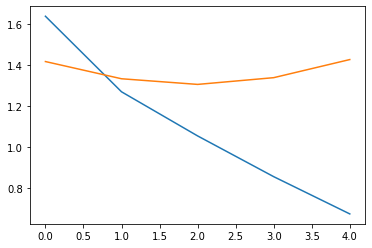

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

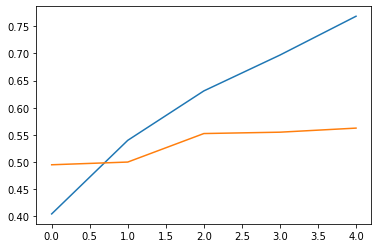

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

- Calculate the accuracy on the test set

In [76]:
score = model_trans.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2001464939117432
Test accuracy: 0.585


- Calculate the confusion matrix

In [77]:
Y_pred = model_trans.predict(X_test)
class_count = len(set(Y_test))
missclassified = []
confusion = np.zeros((class_count, class_count))
for cl in range(Y_test.shape[0]):
    label = Y_test[cl]
    pred = np.argmax(Y_pred[cl])
    confusion[pred,label] += 1
    if pred != label:
        missclassified.append(cl)
print(confusion)

[[36.  4.  4.  2.  3.  5.  4.  7.]
 [ 1. 13.  1.  1.  1.  4.  1.  3.]
 [ 1.  1. 37.  1.  1.  1.  3.  6.]
 [ 3. 18.  4. 37. 10. 13.  3. 10.]
 [ 0.  1.  0.  1. 34.  0.  0.  0.]
 [ 1.  5.  1.  4.  0. 22.  1.  0.]
 [ 4.  5.  0.  2.  0.  2. 37.  6.]
 [ 4.  3.  3.  2.  1.  3.  1. 18.]]


- Have a look at missclassified examples

Truth: Chris Martin (singer) Prediction: Zac Efron (actor)


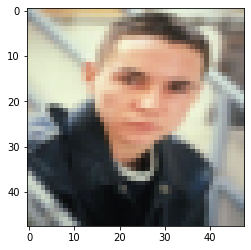

In [78]:
mcl = missclassified[0]
print('Truth:',classes[Y_test[mcl]], 'Prediction:', classes[np.argmax(Y_pred[mcl])])
plt.imshow(X_test[mcl]);

Truth: Emma Stone (actress) Prediction: Jamie Foxx (actor)


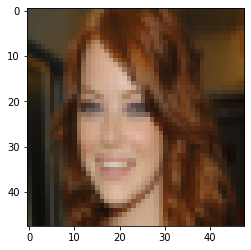

In [79]:
mcl = missclassified[1]
print('Truth:',classes[Y_test[mcl]], 'Prediction:', classes[np.argmax(Y_pred[mcl])])
plt.imshow(X_test[mcl]);

Truth: Chris Martin (singer) Prediction: Jamie Foxx (actor)


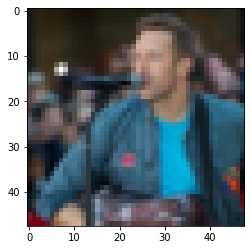

In [80]:
mcl = missclassified[2]
print('Truth:',classes[Y_test[mcl]], 'Prediction:', classes[np.argmax(Y_pred[mcl])])
plt.imshow(X_test[mcl]);

Truth: Jamie Foxx (actor) Prediction: Emma Stone (actress)


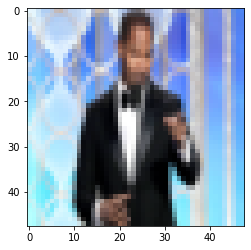

In [81]:
mcl = missclassified[3]
print('Truth:',classes[Y_test[mcl]], 'Prediction:', classes[np.argmax(Y_pred[mcl])])
plt.imshow(X_test[mcl]);

<h3>c) Try to get better.</h3>

Ideas: use dropout and other tricks to prevent overfitting. Try to learn some convulutional layers as well.